# **[Guide pour débutants sur PySpark](https://towardsdatascience.com/beginners-guide-to-pyspark-bbe3b553b79f)**

# Chapitre 1 : Introduction à PySpark en utilisant des données de prix des actions américaines

Syam Kakarla, Towards Data Science, octobre 2020

**PySpark** est une API d"**Apache Spark**, un système de traitement distribué open-source utilisé pour le traitement des big data, qui a été initialement développé en langage de programmation Scala à l'UC Berkeley. Spark dispose d'API de développement en Scala, Java, Python et R, et prend en charge la réutilisation de code pour plusieurs charges de travail : traitement par lots, requêtes interactives, analyses en temps réel, apprentissage automatique et traitement de graphes. Il utilise la mise en cache en mémoire et l'exécution optimisée des requêtes pour des requêtes analytiques rapides sur des données de n'importe quelle taille. Il n'a pas son propre système de fichiers comme Hadoop HDFS, mais prend en charge la plupart des systèmes de fichiers populaires tels que Hadoop Distributed File System (HDFS), HBase, Cassandra, Amazon S3, Amazon Redshift, Couchbase, etc.

Les avantages d'utiliser Apache Spark :
* Il exécute les programmes jusqu'à **100 fois plus rapidement** que **Hadoop MapReduce** en mémoire, ou **10 fois plus rapidement** sur disque. Cela est dû au fait qu'il effectue le traitement dans la mémoire principale des nœuds de travail et évite les opérations d'E/S inutiles.
* Il est **convivial** car il dispose d'API écrites dans des langages populaires, ce qui facilite la tâche des développeurs, car elles masquent la complexité du traitement distribué derrière des opérateurs simples et de haut niveau qui réduisent considérablement la quantité de code nécessaire.
* Il peut être déployé via Mesos, Hadoop via Yarn ou le gestionnaire de cluster de Spark.
* Calcul en temps réel et faible latence grâce au calcul en mémoire.

Dans cet article, nous verrons :
* Configuration de l"environnement dans Google Colab
* Session Spark
* Lecture des données
* Structuration des données à l'aide du schéma Spark
* Différentes méthodes pour inspecter les données
* Manipulation de colonnes
* Gestion des valeurs manquantes
* Interrogation des données
* Visualisation des données
* Écriture/sauvegarde des données dans un fichier
* Conclusion
* Références

Commençons ✨

## Configuration de l'environnement dans Google Colab

Pour exécuter **PySpark** sur une machine locale, nous avons besoin de Java et d'autres logiciels. Au lieu de la procédure d'installation lourde, nous utilisons Google Colaboratory, qui dispose de meilleures spécifications matérielles et est également livré avec une large gamme de bibliothèques pour la science des données et l'apprentissage automatique. Nous devons installer les packages **`pyspark`** et **`Py4J`**. **Py4J** permet aux programmes Python s'exécutant dans un interpréteur Python d'accéder dynamiquement aux objets Java dans une machine virtuelle Java. La commande pour installer les packages mentionnés ci-dessus est la suivante :

```sh
!pip install pyspark  # ==3.0.1   # Hum.. actualiser
!pip install py4j     # ==0.10.9  # Hum.. actualiser
```

## Spark Session

**`SparkSession`** est devenu un point d'entrée vers PySpark depuis la version 2.0. Auparavant, **`SparkContext`** était utilisé comme point d'entrée. **`SparkSession`** est un point d'entrée vers la fonctionnalité sous-jacente de PySpark pour créer de manière programmatique des RDD, des DataFrames et des Datasets PySpark. Il peut être utilisé en remplacement de `SQLContext`, `HiveContext` et d'autres contextes définis avant la version `2.0`. Vous devez également savoir que `SparkSession` crée en interne `SparkConfig` et `SparkContext` avec la configuration fournie avec `SparkSession`. `SparkSession` peut être créé en utilisant le modèle constructeur `SparkSession.builder`.

### Création de SparkSession

Pour créer une `SparkSession`, vous devez utiliser la méthode du modèle constructeur `builder()`.
* `getOrCreate()` : cette méthode renvoie une `SparkSession` existante ; si elle n'existe pas, elle en crée une nouvelle.
* `master()` : si vous l'exécutez sur le cluster, vous devez utiliser le nom de votre maître en tant qu'argument. Habituellement, il s'agit de `yarn` ou `mesos`, en fonction de votre configuration de cluster, et utilisez également `local[X]` lorsque vous exécutez en mode autonome. `X` doit être une valeur entière et doit être supérieure à 0, ce qui représente le nombre de partitions qu'il doit créer lors de l'utilisation de `RDD`, `DataFrame` et `Dataset`. Idéalement, la valeur `X` devrait être le nombre de cœurs de CPU.
* `appName()` : cette méthode est utilisée pour définir le nom de votre application.

Exemple de création d'une **`SparkSession`** :

In [2]:
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder
    .master("local[*]")
    .appName("PySpark_Tutorial")
    .getOrCreate()
)

# where the '*' represents all the cores of the CPU.

📌 `SparkSession.builder` est en fait une méthode, plus précisément une méthode statique de la classe [**`SparkSession`**](https://api-docs.databricks.com/python/pyspark/latest/pyspark.sql/api/pyspark.sql.SparkSession.html). Elle retourne un objet `Builder` qui permet de configurer et de créer une instance de `SparkSession`. On peut ensuite chaîner des méthodes comme `master()`, `appName()`, etc. pour définir les propriétés de la session Spark avant d'appeler `getOrCreate()` pour obtenir la session.

En résumé, `SparkSession.builder` est une méthode qui renvoie un objet `Builder` permettant de configurer et de créer une instance de `SparkSession`.

### Lecture des données

PySpark peut lire des données à partir de différents formats de fichiers tels que les valeurs séparées par des virgules (CSV), le format JavaScript Object Notation (JSON), Parquet, etc. Pour lire différents formats de fichiers, nous utilisons `spark.read()`. Voici des exemples pour lire des données à partir de différents formats de fichiers :

In [ ]:
# Reading CSV file
csv_file = 'data/stocks_price_final.csv'
df = spark.read.csv(csv_file)

# Reading JSON file
json_file = 'data/stocks_price_final.json'
data = spark.read.json(json_file)

# Reading parquet file
parquet_file = 'data/stocks_price_final.parquet'
data1 = spark.read.parquet(parquet_file)

conf par défaut -> déplacer dans mes tips and tricks

Voir : https://stackoverflow.com/questions/30560241/is-it-possible-to-get-the-current-spark-context-settings-in-pyspark

In [3]:
spark.sparkContext._conf.getAll()

[('spark.driver.host', 'host.docker.internal'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.port', '60976'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.startTime', '1684044726885

### Structurer les données à l'aide du schéma Spark

Nous allons lire les données des prix des actions américaines de janvier 2019 à juillet 2020, disponibles dans les ensembles de données Kaggle.

https://www.kaggle.com/datasets/dinnymathew/usstockprices

Le code pour lire les données au format CSV est le suivant :

In [4]:
# Before structuring schema
data = spark.read.csv(
    "data/stocks_price_final.csv",
    sep=",",
    header=True,
)

data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



Le **schéma Spark** représente la structure du DataFrame ou du Dataset. Nous pouvons le définir en utilisant la classe **`StructType`** qui est une collection de **`StructField`**. Chaque `StructField` définit le nom de la colonne (`String`), le type de colonne (`DataType`), la possibilité de valeurs nulles (`Boolean`) et les métadonnées (`MetaData`). Spark infère généralement le schéma à partir des données, mais parfois le type de données inféré peut ne pas être correct ou nous souhaitons définir nos propres noms de colonnes et types de données, en particulier lorsque nous travaillons avec des données non structurées ou semi-structurées.

Voyons comment nous en servir pour structurer nos données :

In [21]:
from pyspark.sql.types import *

schema = StructType([
    StructField("_c0", IntegerType(), True),
    StructField("symbol", StringType(), True),
    StructField("data", DateType(), True),
    StructField("open", DoubleType(), True),
    StructField("high", DoubleType(), True),
    StructField("low", DoubleType(), True),
    StructField("close", DoubleType(), True),
    StructField("volume", IntegerType(), True),
    StructField("adjusted", DoubleType(), True),
    StructField("market.cap", StringType(), True),
    StructField("sector", StringType(), True),
    StructField("industry", StringType(), True),
    StructField("exchange", StringType(), True),
])

data = spark.read.csv(
    "data/stocks_price_final.csv",
    sep=",",
    header=True,
    schema=schema 
)

# Prevent further AnalysisException caused by `market.cap` being interpreted as `market`.`cap`
data = data.withColumnRenamed("market.cap", "market_cap")

data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



Le code ci-dessus montre comment créer une structure en utilisant `StructType` et `StructField`. Ensuite, passez la structure créée en tant que paramètre `schema` lors de la lecture des données avec `spark.read.csv()`. Voyons maintenant le schéma des données structurées.

### Différentes méthodes pour inspecter les données

Il existe plusieurs méthodes utilisées pour inspecter les données. Ce sont `schema`, `dtypes`, `show`, `head`, `first`, `take`, `describe`, `columns`, `count`, `distinct`, `printSchema`. Voyons maintenant l'explication de ces méthodes avec un exemple.

#### `schema()`

Cette méthode renvoie le schéma des données (dataframe).

L'exemple ci-dessous concerne les données des prix des actions américaines.

In [11]:
data.schema

StructType([StructField('_c0', IntegerType(), True), StructField('symbol', StringType(), True), StructField('data', DateType(), True), StructField('open', DoubleType(), True), StructField('high', DoubleType(), True), StructField('low', DoubleType(), True), StructField('close', DoubleType(), True), StructField('volume', IntegerType(), True), StructField('adjusted', DoubleType(), True), StructField('market.cap', StringType(), True), StructField('sector', StringType(), True), StructField('industry', StringType(), True), StructField('exchange', StringType(), True)])

#### `dtypes`

Elle renvoie une liste de tuples avec les noms des colonnes et leurs types de données.

In [22]:
data.dtypes

[('_c0', 'int'),
 ('symbol', 'string'),
 ('data', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market_cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

#### `head(n)`

Elle renvoie les `n` premières lignes sous forme de liste. Voici un exemple :

In [13]:
data.head(3)

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

#### `show()`

Elle affiche les 20 premières lignes par défaut et elle accepte également un nombre en paramètre pour afficher le nombre de lignes des données. Voici un exemple : `show(5)`.

In [15]:
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

#### `first()`

Elle renvoie la première ligne des données.

In [16]:
data.first()

Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

#### `take(n)`

Elle renvoie les `n` premières lignes des données.

In [17]:
data.take(5)

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=4, symbol='TXG', data=datetime.date(2019, 9, 17), open=56.209999, high=60.900002, low=55.423, close=56.779999, volume=602800, adjusted=56.779999, market.cap='$9.31B', sector='Capit

#### `describe()`

Elle calcule les statistiques descriptives des colonnes avec un type de données numérique.

**Note** le code d'origine ci-dessous provoquait ici `AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION]` Une colonne ou un paramètre de fonction portant le nom `market`.`cap` ne peut pas être résolu. Vouliez-vous dire l'une des options suivantes ? [market.cap, data, _c0, adjusted, close]. La raison est que la colonne `market.cap` est interprétée en `market`.`cap`.

In [23]:
data.describe().show()

+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+-----------------+----------+----------------+--------------------+--------+
|summary|              _c0| symbol|              open|              high|               low|             close|            volume|         adjusted|market_cap|          sector|            industry|exchange|
+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+-----------------+----------+----------------+--------------------+--------+
|  count|          1729034|1729034|           1726301|           1726301|           1726301|           1726301|           1725207|          1726301|   1729034|         1729034|             1729034| 1729034|
|   mean|         864517.5|   null|15070.071703341047|15555.067268137085|14557.808227578987| 15032.71485433071|1397692.1627885813| 14926.1096887955|      null|            n

#### `columns`

Elle renvoie une liste contenant les noms des colonnes des données.

In [24]:
data.columns

['_c0',
 'symbol',
 'data',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

#### `count()`

Elle renvoie le nombre de lignes dans les données.

In [25]:
data.count()

1729034

#### `distinct()`

Elle retourne un nouveau DataFrame contenant uniquement les lignes distinctes.

On peut ensuite les dénombrer.

In [29]:
distinct_rows = data.distinct()
distinct_rows.count()

1729034

#### `printSchema()`

Elle affiche le schéma des données.

In [27]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



#### Pas de `shape`

Pour obtenir l'équivalent d'un `.shape` Numpy et Pandas :

In [30]:
n_rows = data.count()
n_cols = len(data.columns)
print("shape:", (n_rows, n_cols))

shape: (1729034, 13)


#### Quid de la poule et de l'œuf ?

Pandas DataFrame est apparu avant Spark DataFrame et a eu une influence significative sur sa conception. Pandas est une bibliothèque Python populaire pour la manipulation et l'analyse de données, offrant une interface simple et expressive. Spark DataFrame a été conçu pour fournir une interface similaire à Pandas DataFrame, afin de faciliter la transition des utilisateurs de Pandas vers Spark lorsqu'ils travaillent avec de grands ensembles de données distribués. Spark DataFrame a été conçu pour prendre en charge le traitement distribué et l'évolutivité, ce qui le rend adapté à des volumes de données beaucoup plus importants que ceux pouvant être gérés par Pandas seul.

### Manipulation des colonnes

Voyons différentes méthodes utilisées pour ajouter, mettre à jour et supprimer des colonnes dans les données.

#### Ajout de colonne

Utilisez la méthode `withColumn`, qui prend deux paramètres : le nom de la colonne et les données à ajouter pour créer une nouvelle colonne dans les données existantes. Voici un exemple :

In [31]:
data = data.withColumn("date", data.data)

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

#### Mise à jour de colonne

Utilisez la méthode `withColumnRenamed`, qui prend deux paramètres : le nom de la colonne existante et le nouveau nom de colonne pour renommer la colonne existante. Voici un exemple :

In [32]:
data = data.withColumnRenamed("date", "data_changed")

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|data_changed|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital 

#### Suppression de colonne

Utilisez la méthode `drop`, qui prend le nom de la colonne et renvoie les données sans cette colonne.

In [33]:
data = data.drop('data_changed')

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

## Gestion des valeurs manquantes

Nous rencontrons souvent des valeurs manquantes lors du traitement de données en temps réel. Ces valeurs manquantes sont codées sous forme de NaN, d'espaces vides ou de marqueurs. Il existe différentes techniques pour traiter les valeurs manquantes, parmi lesquelles :

* **Suppression** : Supprimez les lignes ayant des valeurs manquantes dans l'une des colonnes.
* **Imputation avec la moyenne/médiane** : Remplacez les valeurs manquantes par la moyenne/médiane de la colonne respective. C'est simple, rapide et fonctionne bien avec de petits ensembles de données numériques.
* **Imputation avec les valeurs les plus fréquentes** : Comme son nom l'indique, utilisez la valeur la plus fréquente dans la colonne pour remplacer la valeur manquante de cette colonne. Cela fonctionne bien avec les caractéristiques catégorielles, mais peut également introduire un biais dans les données.
* **Imputation à l'aide de KNN** : K-Nearest Neighbors est un algorithme de classification qui utilise la similarité des caractéristiques en utilisant différentes mesures de distance telles que l'euclidienne, Mahalanobis, Manhattan, Minkowski et Hamming, etc., pour de nouveaux points de données. Cela est très efficace par rapport aux méthodes mentionnées ci-dessus pour l'imputation des valeurs manquantes, en fonction de l'ensemble de données, mais cela peut être coûteux en termes de calcul et sensible aux valeurs aberrantes.

Voyons comment nous pouvons utiliser PySpark pour traiter les valeurs manquantes :

In [ ]:
import pyspark.sql.functions as f

# Remove Rows with Missing Values
data.na.drop()

# Replacing Missing Values with Mean
#data.na.fill(data.select(f.mean(data["open"])).collect()[0][0])
data.na.fill({'open': data.select(f.mean(data['open'])).collect()[0][0]})

# Replacing Missing Values with new values
data.na.replace(old_value, new_value)

## Interrogation des données

PySpark et PySpark SQL offrent une large gamme de méthodes et de fonctions pour interroger les données avec facilité. Voici quelques-unes des méthodes les plus utilisées :

* `Select` (Sélectionner)
* `Filter` (Filtrer)
* `Between` (Entre)
* `When` (Quand)
* `Like` (Comme)
* `GroupBy` (Regrouper par)
* `Aggregations` (Agrégations)

### `Select` (Sélectionner)

Cette méthode est utilisée pour sélectionner une ou plusieurs colonnes en utilisant les noms des colonnes. Voici un exemple simple :

In [34]:
## Selecting Single Column
data.select("sector").show(5)

## Selecting Multiple columns
data.select(["open", "close", "adjusted"]).show(5)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|     54.0|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|     62.0|     62.0|
+---------+---------+---------+
only showing top 5 rows



### `Filter` (Filtrer)

Permet de filtrer les données en fonction d'une condition donnée. Vous pouvez également donner plusieurs conditions en utilisant les opérateurs AND (&), OR (|) et NOT (~). Voici un exemple pour récupérer les données des prix des actions de janvier 2020.

Noter la différence avec le *boolean indexing* Pandas : avec Pandas, on aurait écrit `data.data >= "2020-01-01"` et non formé une colonne littérale. La différence est dans le mode d'évaluation. Avec Pandas, l'évaluation serait immédiate tandis qu'avec Spark, l'évaluation est paresseuse, et donc reportée à plus tard.

In [35]:
from pyspark.sql.functions import col, lit
data.filter(
    (col("data") >= lit("2020-01-01"))
    & (col("data") <= lit("2020-01-31"))
).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close|volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

### `Between` (Entre)

Cette méthode renvoie `True` ou `False` en fonction des valeurs fournies dans la méthode `between`. Voyons un exemple pour récupérer les données où la valeur ajustée se situe entre 100 et 500.

In [36]:
## fetch the data where the adjusted value is between 100.0 and 500.0
data.filter(data.adjusted.between(100.0, 500.0)).show()

+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
| _c0|symbol|      data|      open|      high|       low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|
+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  93|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|6893|  ABMD|2019-01-02|315.940002|320.709991|307.029999|309.959991|590000|309.959991|   $13.39B|  Health Care|Medical/Dental In...|  NASDAQ|
|6894|

### `When` (Quand)

Cette méthode renvoie 0 ou 1 en fonction de la condition donnée. L'exemple suivant montre comment sélectionner le prix d'ouverture et de clôture des actions lorsque le prix ajusté est supérieur ou égal à 200.

In [38]:
import pyspark.sql.functions as f
data.select("open", "close", f.when(data.adjusted >= 200.0, 1).otherwise(0)).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



### `Like` (Comme)

C'est similaire à l'opérateur `like` en SQL. L'exemple suivant montre comment extraire les noms de secteurs qui commencent par M ou C en utilisant `rlike`.

`rlike()` utilise la syntaxe des expressions régulières POSIX.

Pour employer des expressions régulières PCRE (Perl Compatible Regular Expressions), il faut utiliser les méthodes suivantes :
* `regexp_replace()` : remplace les occurrences correspondant à une expression régulière par une autre valeur dans une chaîne de caractères. Elle est utile pour effectuer des transformations complexes sur les données en utilisant des expressions régulières.
* `regexp_extract()` : extrait des sous-chaînes d'une chaîne de caractères correspondant à un motif d'expression régulière donné. Elle renvoie la première occurrence correspondante à partir de la chaîne d'entrée.
* `regexp_replace_all()` : remplace toutes les occurrences correspondant à une expression régulière par une autre valeur dans une chaîne de caractères.
* `regexp_split()` : divise une chaîne de caractères en un tableau de sous-chaînes en utilisant un motif d'expression régulière comme délimiteur.

In [41]:
data.select(
    "sector", 
    data.sector.rlike("^[B, C]").alias('Sector Starting with B or C')
).distinct().show()

+--------------------+---------------------------+
|              sector|Sector Starting with B or C|
+--------------------+---------------------------+
|         Health Care|                      false|
|       Capital Goods|                       true|
|Consumer Non-Dura...|                       true|
|    Public Utilities|                      false|
|   Consumer Durables|                       true|
|             Finance|                      false|
|      Transportation|                      false|
|       Miscellaneous|                      false|
|   Consumer Services|                       true|
|              Energy|                      false|
|    Basic Industries|                       true|
|          Technology|                      false|
+--------------------+---------------------------+



### `GroupBy` (Regrouper par)

Le nom lui-même indique qu'il regroupe les données selon le nom de colonne donné et peut effectuer différentes opérations telles que la somme, la moyenne, le minimum, le maximum, etc. L'exemple suivant explique comment obtenir le prix moyen d'ouverture, de clôture et ajusté par rapport aux industries.

In [42]:
data.select(["industry", "open", "close", "adjusted"]).groupBy('industry').mean().show()

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...| 5.134401785714288| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938775|16.359879090306126|16.148959322959186|
|Investment Banker...| 58.95058094575025| 58.98308596082618| 58.15783725890315|
|        Broadcasting| 24.91678746482516|24.917388455395148|24.699102029625312|
|Biotechnology: Bi...| 24.80808319232425|24.803587149935485|24.745079978273242|
|Other Specialty S...|  84.8071881056286|  84.8027655092983| 84.55525036482351|
|Biotechnology: El...| 33.36891734535046| 33.33611913546896| 33.21022605613575|
|Other Consumer Se...| 43.67010744224605| 43.65868871146482|43.434989808790206|
|Electric Utilitie...| 41.35569183903099| 41.37105559357327|40.392457352420074|
|        Water Supply| 40.58048308203543

### Aggregation (Agrégation)

PySpark fournit des fonctions d'agrégation standard intégrées définies dans l'API DataFrame. Elles sont très utiles lorsque nous devons effectuer des opérations d'agrégation sur des colonnes de données. Les fonctions d'agrégation fonctionnent sur un groupe de lignes et calculent une seule valeur de retour pour chaque groupe. L'exemple suivant montre comment afficher les prix d'ouverture, de clôture et ajustés minimums, maximums et moyens de janvier 2019 à janvier 2020 en ce qui concerne les secteurs.

Quelques exemples de fonctions d'agrégation couramment utilisées dans PySpark :
* `count()` : compte le nombre d'enregistrements dans un groupe.
* `sum()` : calcule la somme des valeurs d'une colonne numérique dans un groupe.
* `avg()` : calcule la moyenne des valeurs d'une colonne numérique dans un groupe.
* `min()` : trouve la valeur minimale d'une colonne dans un groupe.
* `max()` : trouve la valeur maximale d'une colonne dans un groupe.
* `first()` : récupère la première valeur d'une colonne dans un groupe.
* `last()` : récupère la dernière valeur d'une colonne dans un groupe.
* `collect_list()` : collecte les valeurs d'une colonne dans une liste dans un groupe.
* `collect_set()` : collecte les valeurs uniques d'une colonne dans un ensemble dans un groupe.

In [43]:
import pyspark.sql.functions as f
data.filter(
    (col('data') >= lit('2019-01-02'))
    & (col('data') <= lit('2020-01-31'))
).groupBy("sector").agg(
    f.min("data").alias("From"), 
    f.max("data").alias("To"), 

    f.min("open").alias("Minimum Opening"),
    f.max("open").alias("Maximum Opening"), 
    f.avg("open").alias("Average Opening"), 

    f.min("close").alias("Minimum Closing"), 
    f.max("close").alias("Maximum Closing"), 
    f.avg("close").alias("Average Closing"), 

    f.min("adjusted").alias("Minimum Adjusted Closing"), 
    f.max("adjusted").alias("Maximum Adjusted Closing"), 
    f.avg("adjusted").alias("Average Adjusted Closing"), 
).show(truncate=False)

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16           |690.0          |51.51619596530089 |0.16           |691.099976     |51.549534122690304|0.16                    |691.099976              |51.21050733851888       |
|Health Care          |2019-01-02|2020-01-31|0.072          |186000.0       |146.7756197567625 |0.071       

### Visualisation des données

Nous allons utiliser `matplotlib` et `pandas` pour visualiser les données. La méthode `toPandas()` est utilisée pour convertir les données en un dataframe pandas. En utilisant ce dataframe, nous utilisons la méthode `plot()` pour visualiser les données. Le code ci-dessous montre comment afficher un graphique en barres pour la moyenne des prix d'ouverture, de clôture et ajustés en fonction du secteur.

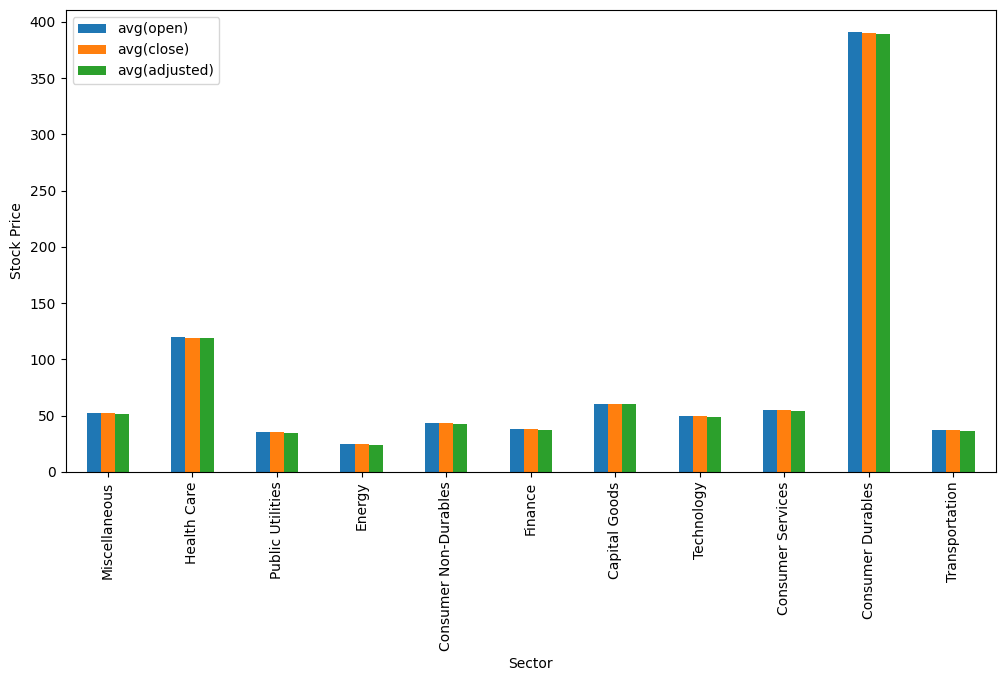

In [44]:
import matplotlib.pyplot as plt

sec_df = (
  data
  .select(["sector", "open", "close", "adjusted"])
  .groupBy("sector").mean().toPandas()
)

ind = list(range(12))
ind.pop(6)

sec_df.iloc[ind ,:].plot(
  kind="bar", x="sector", y=sec_df.columns.tolist()[1:],
  figsize=(12, 6), ylabel="Stock Price", xlabel="Sector")
plt.show()

De même, visualisons la moyenne des prix d'ouverture, de clôture et ajustés en fonction des industries.

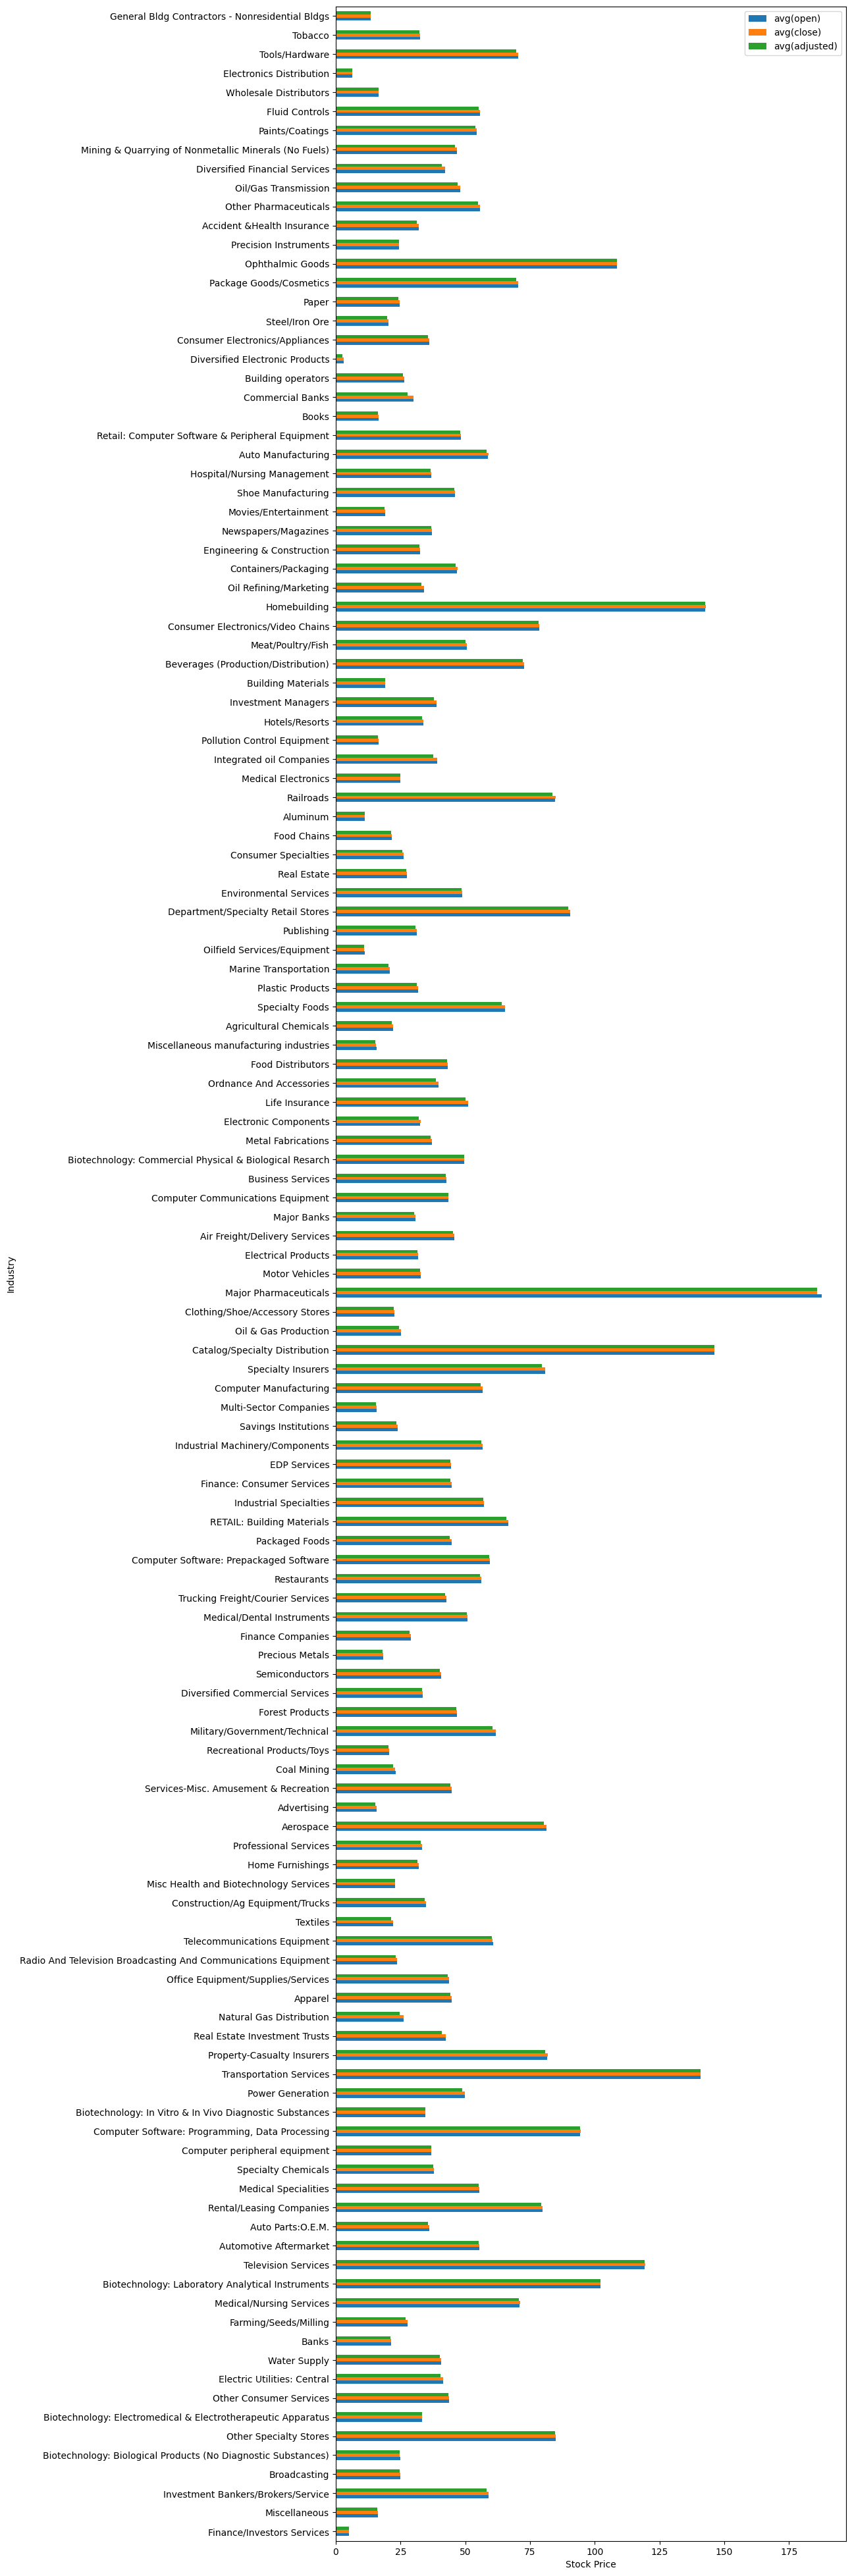

In [45]:
industries_x = data.select(["industry", "open", "close", "adjusted"]).groupBy("industry").mean().toPandas()

q = industries_x[
    (industries_x.industry != 'Major Chemicals')
    & (industries_x.industry != 'Building Products')
]

q.plot(
    kind="barh",
    x="industry", y=q.columns.tolist()[1:],
    figsize=(10, 50), xlabel="Stock Price", ylabel="Industry"
)

plt.show()

Jetons un coup d'œil au graphique en séries temporelles des prix d'ouverture, de clôture et ajustés du secteur technologique.

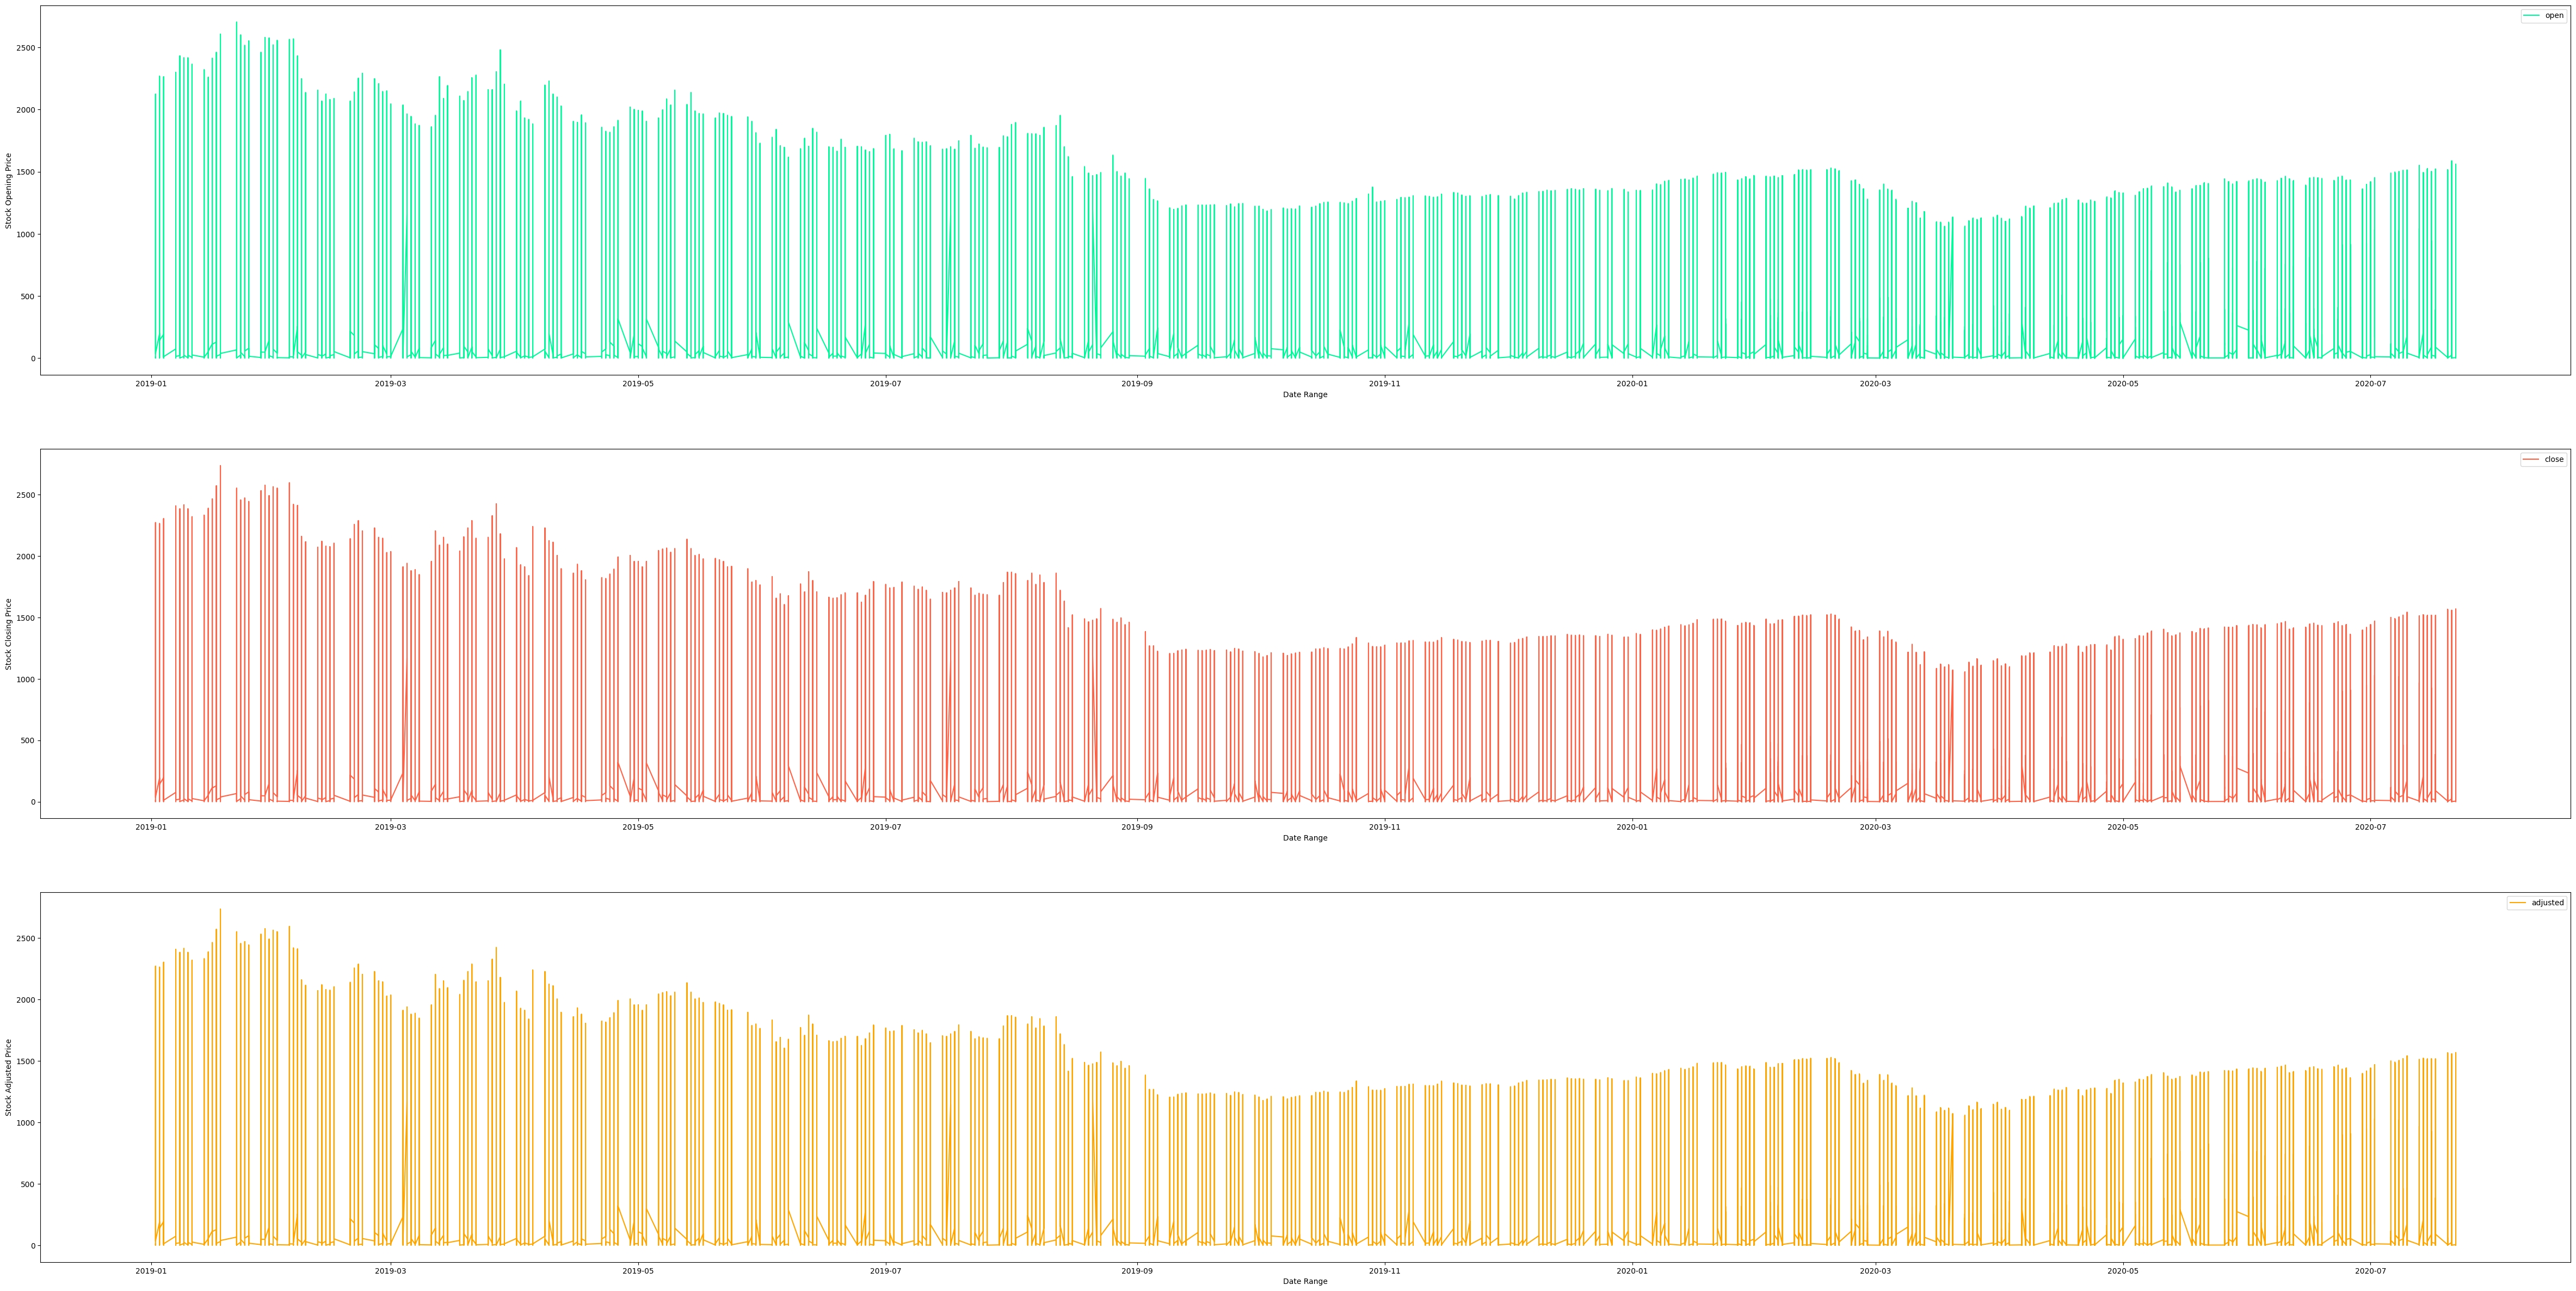

In [46]:
from pyspark.sql.functions import col

tech = (
    data.where(col("sector") == "Technology")
    .select("data", "open", "close", "adjusted")
)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(60, 30))

tech.toPandas().plot(
    kind="line",
    x="data", y="open", 
    xlabel="Date Range", ylabel="Stock Opening Price", 
    ax=axes[0], color="mediumspringgreen"
)

tech.toPandas().plot(
    kind="line",
    x="data", y="close",
    xlabel="Date Range", ylabel="Stock Closing Price",
    ax=axes[1], color="tomato"
)

tech.toPandas().plot(
    kind="line", x="data", y="adjusted", 
    xlabel="Date Range", ylabel="Stock Adjusted Price", 
    ax=axes[2], color="orange"
)

plt.show()

## Écrire/Sauvegarder les données dans un fichier

La méthode `write.save()` est utilisée pour sauvegarder les données dans différents formats tels que CSV, JSON, Parquet, etc. Voyons comment sauvegarder les données dans différents formats de fichiers. Nous pouvons sauvegarder l'ensemble des données ou sélectionner des données à l'aide de la méthode `select()`.

In [48]:
## Writing entire data to different file formats

# CSV
data.write.csv("dataset.csv")

# JSON
data.write.save("dataset.json", format="json")

# Parquet
data.write.save("dataset.parquet", format="parquet")

## Writing selected data to different file formats
selected_data = data.select(["data", "open", "close", "adjusted"])

# CSV
selected_data.write.csv("_dataset.csv")

# JSON
selected_data.write.save("_dataset.json", format="json")

# Parquet
selected_data.write.save("_dataset.parquet", format="parquet")

## Conclusion

PySpark est un excellent langage à apprendre pour les data scientists car il permet l'analyse et les pipelines ML évolutifs. Si vous êtes déjà familiarisé avec Python, SQL et Pandas, alors PySpark est un excellent point de départ.

Cet article a montré comment effectuer une large gamme d'opérations, de la lecture des fichiers à l'écriture des résultats dans un fichier en utilisant PySpark. Il a également abordé les techniques de visualisation de base à l'aide de matplotlib pour visualiser les résultats. De plus, les notebooks Google Colaboratory sont un excellent moyen de commencer à apprendre PySpark sans installer les logiciels nécessaires. Consultez les références qui vous aideront à apprendre PySpark plus facilement et plus rapidement.

N'hésitez pas à accéder/utiliser le code que j'ai écrit dans l'article en utilisant le notebook Colab ci-dessous et GitHub.

Bon apprentissage ! ✨